In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('data/survey_results_public.csv', index_col='Respondent')

In [4]:
df.dropna(axis='index', how='any', subset=['Age', 'LanguageWorkedWith', 'ConvertedComp'], inplace=True)
df['Age'] =df ['Age'].astype(int)

In [5]:
dev_sal = df.groupby('Age')['ConvertedComp'].median().loc[18:60]

In [6]:
py_sal = df.loc[df['LanguageWorkedWith'].str.contains('Python')].groupby('Age')['ConvertedComp'].median().loc[18:60]
js_sal = df.loc[df['LanguageWorkedWith'].str.contains('JavaScript')].groupby('Age')['ConvertedComp'].median().loc[18:60]

In [7]:
ages_x = dev_sal.index

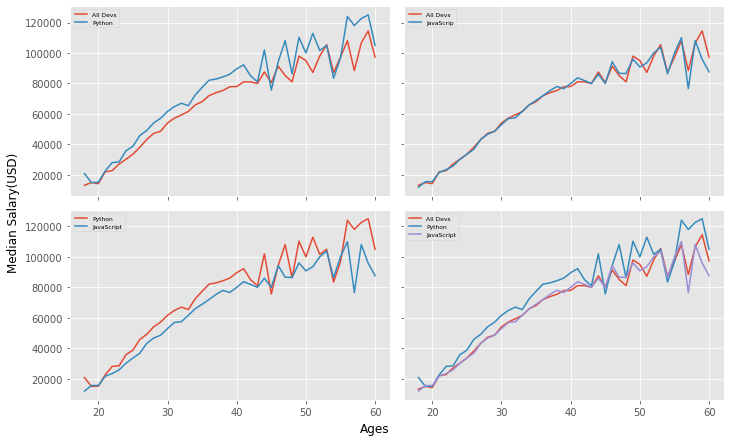

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10,6), sharex=True, sharey=True)

ax1 = axs[0,0]
ax1.plot(ages_x, dev_sal, label='All Devs')
ax1.plot(ages_x, py_sal, label='Python')
ax1.legend(fontsize=6)

ax2 = axs[0,1]
ax2.plot(ages_x, dev_sal, label='All Devs')
ax2.plot(ages_x, js_sal, label='JavaScrip')
ax2.legend(loc='upper left', fontsize=6)
#ax2.legend(loc=(.01,.89), fontsize=6)

ax3 = axs[1,0]
ax3.plot(ages_x, py_sal, label='Python')
ax3.plot(ages_x, js_sal, label='JavaScript')
ax3.legend(fontsize=6)

ax4 = axs[1,1]
ax4.plot(ages_x, dev_sal, label='All Devs')
ax4.plot(ages_x, py_sal, label='Python')
ax4.plot(ages_x, js_sal, label='JavaScript')
ax4.legend(fontsize=6)

fig.text(-.01, .5, s='Median Salary(USD)', va='center', rotation='vertical', size=12)
fig.text(.50, -.01, s='Ages', ha='center', size=12)
fig.tight_layout()
#fig.savefig('savefig/subplot.svg')